In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-aspects/dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the appropriate matplotlib backend for Kaggle and inline plotting
matplotlib.use('Agg')
plt.switch_backend('Agg')
%matplotlib inline


# Set plot style
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
file_path='/kaggle/input/social-media-aspects/dataset.csv'

df = pd.read_csv(file_path, encoding='ascii', delimiter=',')


In [4]:
df.head()

,What is your age group?,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


## Data Cleaning and Preprocessing

In [6]:
print('Dataframe info:')
df.info()

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   What is your age group?                                       49 non-null     object
 1     What is your occupation?                                    49 non-null     object
 2   Where do you live?                                            49 non-null     object
 3   How many hours per day do you spend on social media?          49 non-null     object
 4   How has social media affected your real-life relationships?   49 non-null     object
 5   How frequently do you use email for communication?            49 non-null     object
 6   Do you use LinkedIn for professional networking?              49 non-null     object
 7   How often do you use WhatsApp for communication?              49 n

In [7]:
print('\nMissing values in each column:')
df.isnull().sum()


Missing values in each column:


What is your age group?                                         0
  What is your occupation?                                      0
Where do you live?                                              0
How many hours per day do you spend on social media?            0
How has social media affected your real-life relationships?     0
How frequently do you use email for communication?              0
Do you use LinkedIn for professional networking?                0
How often do you use WhatsApp for communication?                0
Which social media platforms do you use the most?               0
Do you feel that social media affects your mental health?       0
dtype: int64

In [10]:
# Renaming each column
df.rename(columns={
    df.columns[0]: "Age_Group",  # What is your age group?
    df.columns[1]: "Occupation",  # What is your occupation?
    df.columns[2]: "Location",  # Where do you live?
    df.columns[3]: "Daily_Social_Media_Hrs",  # How many hours per day do you spend on social media?
    df.columns[4]: "Relationship_Impact",  # How has social media affected your real-life relationships?
    df.columns[5]: "Email_Frequency",  # How frequently do you use email for communication?
    df.columns[6]: "LinkedIn_Use",  # Do you use LinkedIn for professional networking?
    df.columns[7]: "Whatsapp_Frequency",  # How often do you use WhatsApp for communication? 
    df.columns[8]: "Primary_Social_Platform",  # Which social media platforms do you use the most?
    df.columns[9]: "Mental_Health_Impact"  # Do you feel that social media affects your mental health?
}, inplace=True)

In [11]:
# Since most of the columns in this dataset are categorical, we fill missing values
# with the placeholder 'Missing'. This resolves the common error many users face when
# using categorical variables in model training.
df_filled = df.fillna('Missing')

In [12]:
df_filled.head()

,Age_Group,Occupation,Location,Daily_Social_Media_Hrs,Relationship_Impact,Email_Frequency,LinkedIn_Use,Whatsapp_Frequency,Primary_Social_Platform,Mental_Health_Impact
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


## Exploratory Data Analysis

1. Distribution of age & occupation groups
2. Mental Health Impact Perception
3. Daily Social Media Hours
4. Impact of social media on real life relationships
5. Chi Square Test on Daily Social Media Usage & Relationship Impact

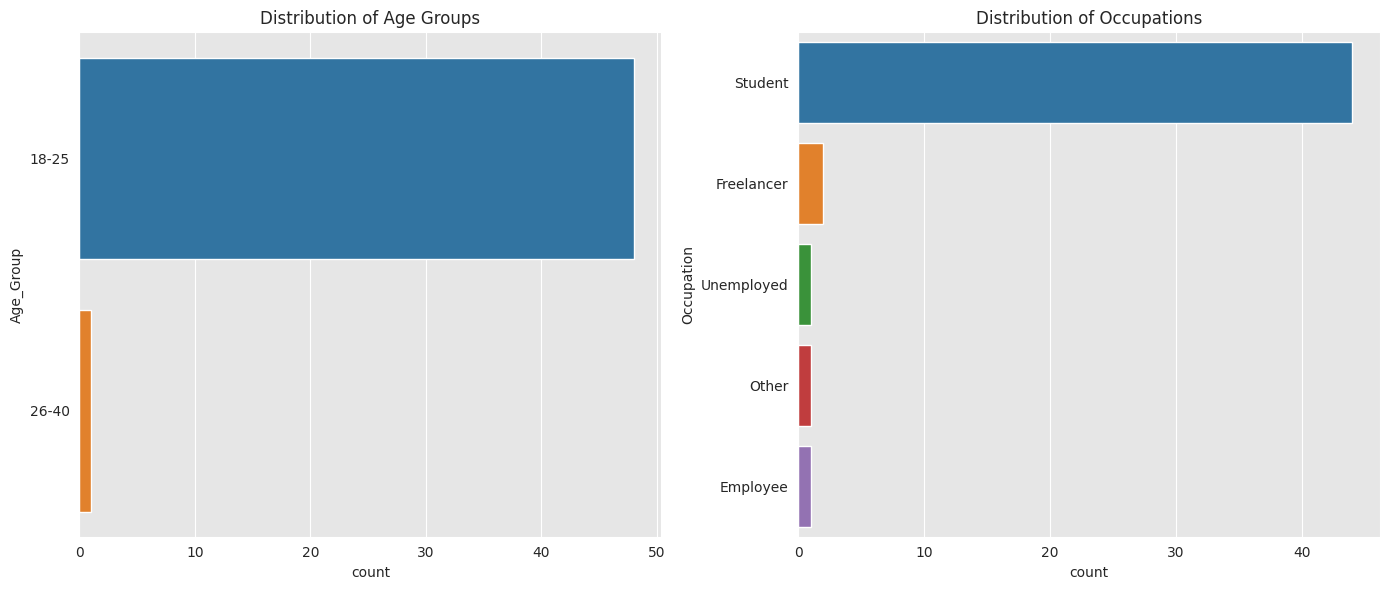

In [29]:

plt.figure(figsize=(14,6))

# Age Group
plt.subplot(1, 2, 1) 
sns.countplot(y=df_filled['Age_Group'])
plt.title('Distribution of Age Groups')


# Occupation
plt.subplot(1, 2, 2) 
sns.countplot(y=df_filled['Occupation'])
plt.title('Distribution of Occupations')


plt.tight_layout()
plt.show()

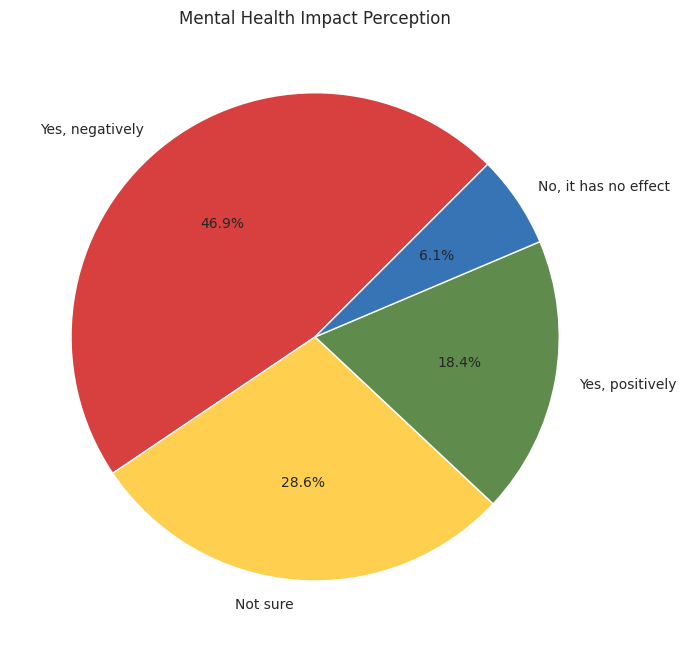

In [60]:
# The colors will be applied in the order of the data
colors = ['#D84040', '#FFCF50', '#5F8B4C','#3674B5']

plt.figure(figsize=(7,7))

target_counts = df_filled['Mental_Health_Impact'].value_counts()
plt.pie(target_counts, labels=target_counts.index, colors=colors, autopct='%1.1f%%', startangle=45)
plt.title('Mental Health Impact Perception')

plt.tight_layout()
plt.show()

In [39]:
daily_hour_count=df_filled['Daily_Social_Media_Hrs'].value_counts().sort_index()
daily_hour_count

Daily_Social_Media_Hrs
1-2 hours            16
3-5 hours            18
Less than 1 hour      1
More than 5 hours    14
Name: count, dtype: int64

In [43]:
# To maintain the consistency of this column, replacing of certain values is necessary

df_filled['Daily_Social_Media_Hrs'] = df_filled['Daily_Social_Media_Hrs'].replace({
    'Less than 1 hour': '0-1 hours',
    'More than 5 hours': '5+ hours'
})

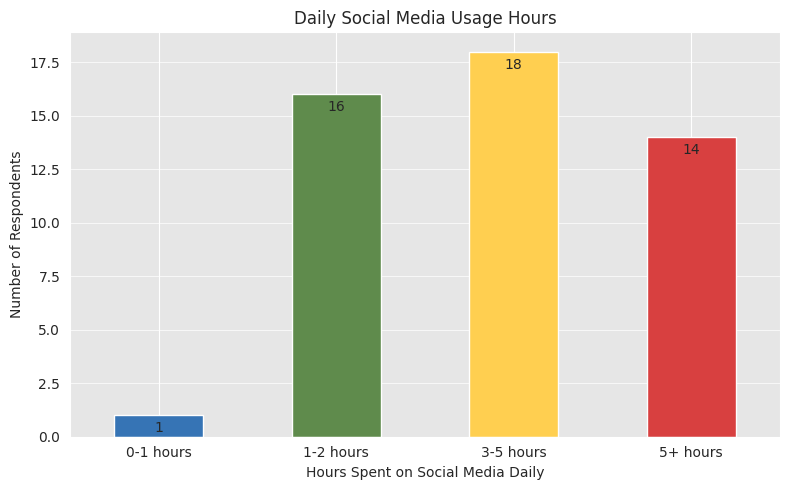

In [65]:
daily_hour_count=df_filled['Daily_Social_Media_Hrs'].value_counts().sort_index()

#  bar plot
plt.figure(figsize=(8, 5))
daily_hour_count.plot(kind='bar', color=['#3674B5','#5F8B4C','#FFCF50','#D84040'])  
plt.title('Daily Social Media Usage Hours')
plt.xlabel('Hours Spent on Social Media Daily')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)  
plt.grid(axis='y', alpha=0.7)  

# counts on top of each bar
for i, v in enumerate(daily_hour_count):
    plt.text(i, v - 0.8, str(v), ha='center')  

plt.tight_layout() 
plt.show()

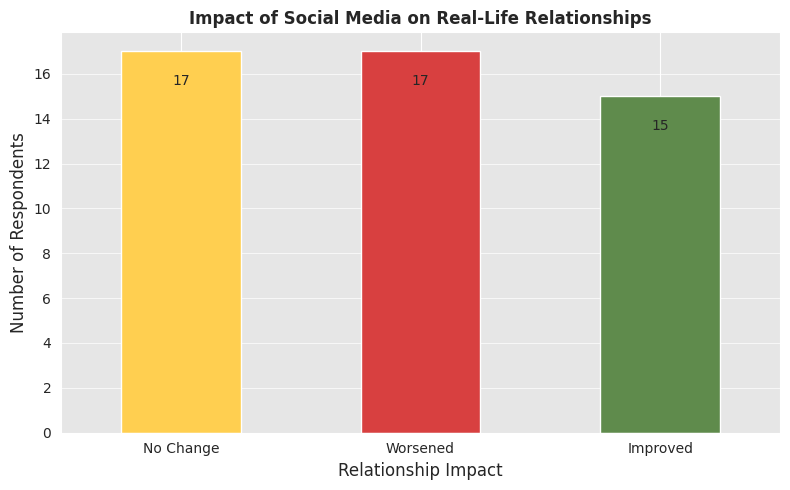

In [68]:
relationship_counts = df_filled['Relationship_Impact'].value_counts()

colors = {
    'Improved': '#5F8B4C',
    'No Change': '#FFCF50',
    'Worsened': '#D84040'
}


# plotting
plt.figure(figsize=(8, 5))
relationship_counts.plot(kind='bar', color=[colors.get(x, 'gray') for x in relationship_counts.index])

# Add labels and title
plt.title('Impact of Social Media on Real-Life Relationships', fontweight='bold')
plt.xlabel('Relationship Impact', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0) 

for i, v in enumerate(relationship_counts):
    plt.text(i, v - 1.5, str(v), ha='center', fontsize=10)

plt.grid(axis='y',alpha=0.7)
plt.tight_layout()
plt.show()

**Cross tabulation** (or crosstab) is an important tool for analyzing two categorical variables in a dataset. It provides a tabular summary of the frequency distribution of two variables, allowing us to see the relationship between them and identify any patterns or trends.

In [84]:
cross_tab = pd.crosstab(index=df_filled['Daily_Social_Media_Hrs'],
                        columns=df_filled['Relationship_Impact'], 
                        # normalize='index',
                        margins=False )
cross_tab


Relationship_Impact,Improved,No Change,Worsened
Daily_Social_Media_Hrs,,,
0-1 hours,0,1,0
1-2 hours,6,5,5
3-5 hours,3,8,7
5+ hours,6,3,5


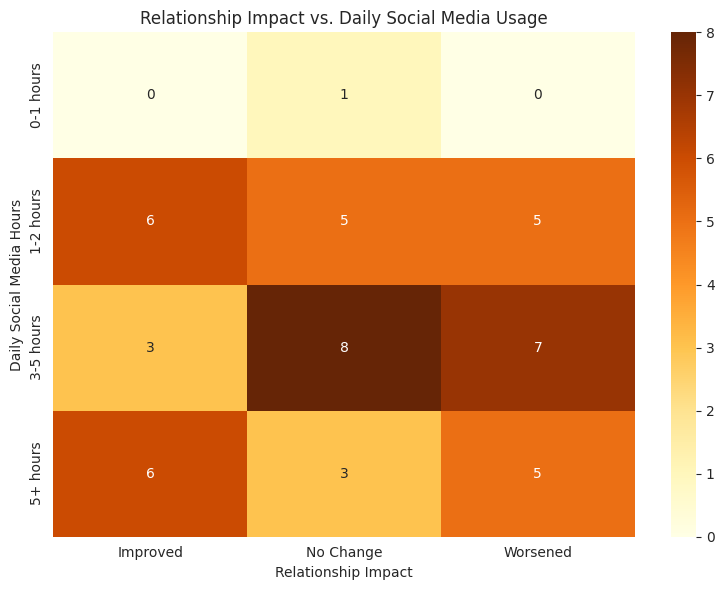

In [88]:
# Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlOrBr', cbar=True)
plt.title('Relationship Impact vs. Daily Social Media Usage')
plt.xlabel('Relationship Impact')
plt.ylabel('Daily Social Media Hours')
plt.tight_layout()
plt.show()

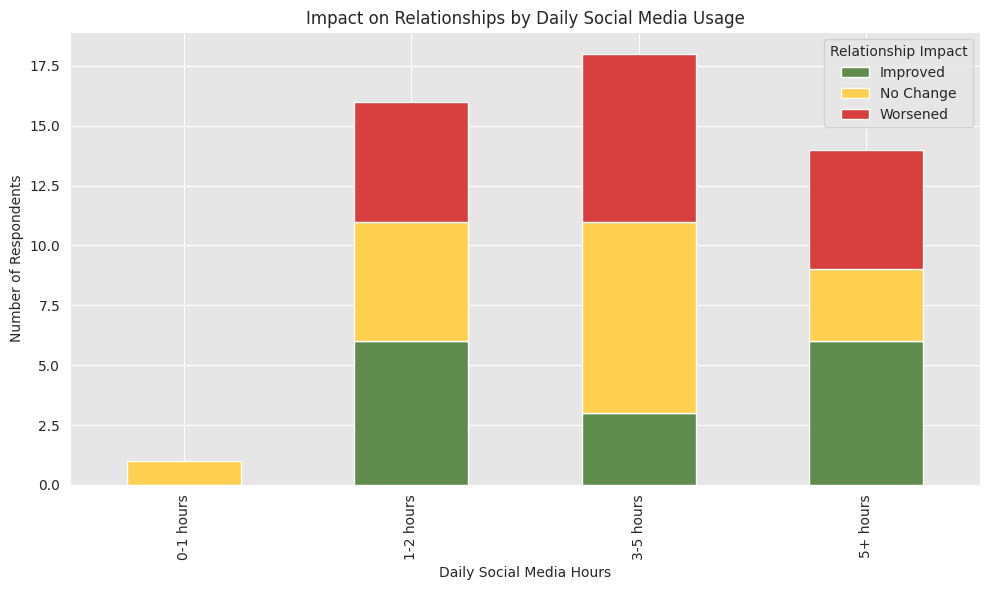

In [85]:
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5F8B4C','#FFCF50','#D84040'])
plt.title('Impact on Relationships by Daily Social Media Usage')
plt.xlabel('Daily Social Media Hours')
plt.ylabel('Number of Respondents')
plt.legend(title='Relationship Impact')
plt.tight_layout()
plt.show()


In [90]:
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(df_filled['Daily_Social_Media_Hrs'],
                      df_filled['Relationship_Impact']
                      )


chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"Chi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square Statistic: 5.3678
Degrees of Freedom: 6
P-value: 0.4976


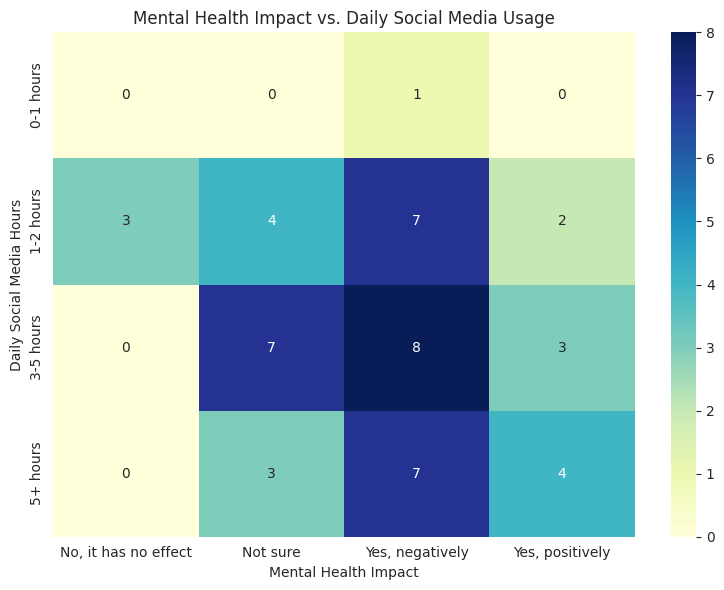

In [113]:

mental_cross_tab=pd.crosstab(df_filled['Daily_Social_Media_Hrs'],
                      df_filled['Mental_Health_Impact']
                      )

plt.figure(figsize=(8, 6))
sns.heatmap(mental_cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mental Health Impact vs. Daily Social Media Usage')
plt.xlabel('Mental Health Impact')
plt.ylabel('Daily Social Media Hours')
plt.tight_layout()
plt.show()

In [114]:
# chi square test for correlation between mental health & daily usage

chi2, p, dof, expected = chi2_contingency(mental_cross_tab)

print(f"Chi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square Statistic: 9.4571
Degrees of Freedom: 9
P-value: 0.3962


### Is there a relationship between time spent on social media and its impact on mental health?
There's no strong evidence of a relationship between daily social media usage and its perceived impact on mental health, based on your dataset. The Chi Square test says no statistically significant correlation found between Mental Health & Daily Usage.

In [91]:
df_filled['Primary_Social_Platform'].value_counts()

Primary_Social_Platform
Facebook     36
Instagram     6
Others        4
LinkedIn      3
Name: count, dtype: int64

In [93]:
platform_by_hours = pd.crosstab(
    index=df_filled['Daily_Social_Media_Hrs'],
    columns=df_filled['Primary_Social_Platform'],
    margins=False
)

platform_by_hours

Primary_Social_Platform,Facebook,Instagram,LinkedIn,Others
Daily_Social_Media_Hrs,,,,
0-1 hours,0,0,1,0
1-2 hours,12,3,0,1
3-5 hours,16,0,0,2
5+ hours,8,3,2,1


In [101]:
# chi square test for correlation between platform & daily usage

chi2, p, dof, expected = chi2_contingency(platform_by_hours)

print(f"Chi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square Statistic: 24.0368
Degrees of Freedom: 9
P-value: 0.0042


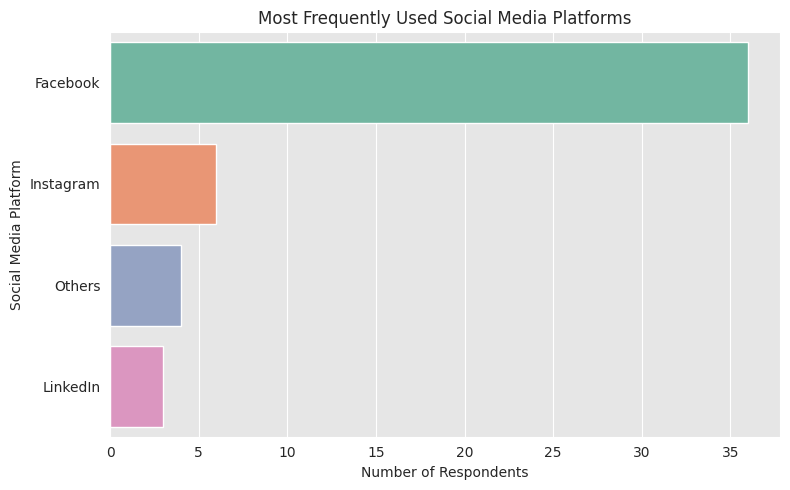

In [103]:
platform_counts = df['Primary_Social_Platform'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='Set2')
plt.title('Most Frequently Used Social Media Platforms')
plt.xlabel('Number of Respondents')
plt.ylabel('Social Media Platform')
plt.tight_layout()
plt.show()

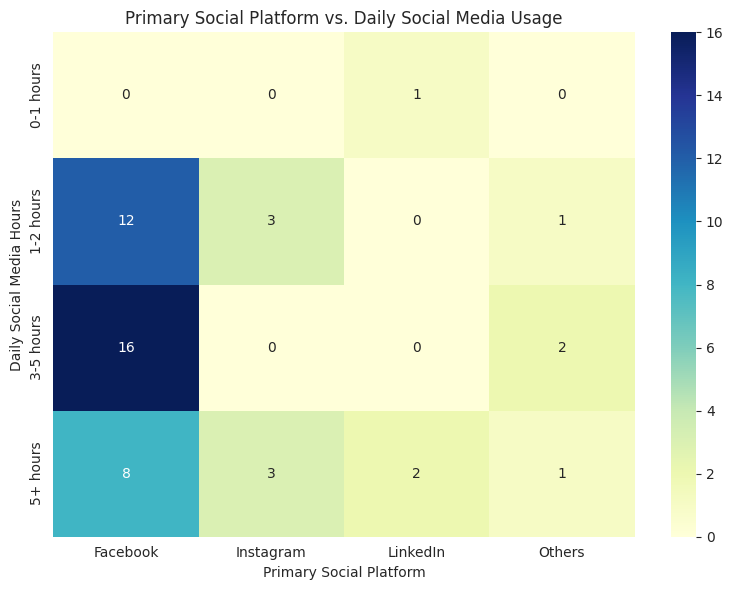

In [111]:
plt.figure(figsize=(8, 6))
sns.heatmap(platform_by_hours, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Primary Social Platform vs. Daily Social Media Usage')
plt.xlabel('Primary Social Platform')
plt.ylabel('Daily Social Media Hours')
plt.tight_layout()
plt.show()

### Questions
1. why crosstabbing?
2. why chi square test
3. what does it's results mean?

### Interesting Questions to Explore


✅ Is there a relationship between time spent on social media and its impact on mental health?

✅ Which platforms are most used by different age groups?
* Do students spend more time on social media than working professionals?
* Is LinkedIn primarily used by urban professionals or also by rural users?
* Do people who use WhatsApp more also use email less?
* Are younger users more likely to say social media affects their mental health?
* What are the trends between social media use and perceived impact on real-life relationships?


In [116]:
# Which platforms are most used by different age groups?
platform_by_age = pd.crosstab(df['Age_Group'], df['Primary_Social_Platform'])
print(platform_by_age)


Primary_Social_Platform  Facebook  Instagram  LinkedIn  Others
Age_Group                                                     
18-25                          35          6         3       4
26-40                           1          0         0       0
